# Millikan Oil Drop Analysis

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.constants as sc
import csv

In [3]:
# Data filename
filename = "Millikan V data.csv"

# Experiment conditions
temp = 292.3049   # K
E    = 305.5 / 0.0076 # V / d
p    = 105655.3 # Pascal
b    = 8.2E-3 # Pa * m

# Resultant consts
g = sc.g
rho = 886 # kg/m^3
eta = (1.827E-5)*(291.15 + 120) / (temp + 120) * ((temp/291.15)**(3/2))


In [4]:
vels = []

with open(filename) as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    vels = [row for row in csv_reader][1:]
    vels = [(float(row[15]), float(row[16])) for row in vels]

In [5]:

def calc_q(velpair):
    a = math.sqrt((9 * eta * velpair[0]) / (2 * rho * g))
    result = (sc.pi * 6) / E
    result = result * (velpair[0] + velpair[1]) * math.sqrt(velpair[0])
    result = result * ((1 / (1 + (b / (p * a))))**(3/2))
    result = result * math.sqrt((9 * (eta**3))/ (2 * rho * g))

    result = result / sc.e
    return result

qs = [calc_q(pair) for pair in vels]

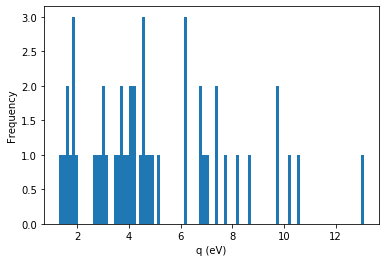

In [6]:
# Plot Results
num_bins = 50

fig, ax = plt.subplots()
n, bins, patches = ax.hist(qs, bins=100)
ax.set_xlabel("q (eV)")
ax.set_ylabel("Frequency")

plt.show()

In [7]:

array_dict = {
    1: list(filter(lambda val: (val > 0.5 and val < 1.5), qs)),
    2: list(filter(lambda val: (val > 1.5 and val < 2.5), qs)),
    3: list(filter(lambda val: (val > 2.5 and val < 3.5), qs)),
    4: list(filter(lambda val: (val > 3.5 and val < 4.5), qs)),
    5: list(filter(lambda val: (val > 4.5 and val < 5.5), qs)),
    6: list(filter(lambda val: (val > 5.5 and val < 6.5), qs)),
    7: list(filter(lambda val: (val > 6.5 and val < 7.5), qs)),
    8: list(filter(lambda val: (val > 7.5 and val < 8.5), qs)),
    9: list(filter(lambda val: (val > 8.5 and val < 9.5), qs)),
    10: list(filter(lambda val: (val > 9.5 and val < 10.5), qs)),
    11: list(filter(lambda val: (val > 10.5 and val < 11.5), qs)),
    12: list(filter(lambda val: (val > 11.5 and val < 12.5), qs)),
    13: list(filter(lambda val: (val > 12.5 and val < 13.5), qs)),
}

x = [1, 2, 3, 4, 5, 6, 7, 8, 10]
y = []
sigma = []
for i in x:
    y.append(np.mean(array_dict[i]))
    sigma.append(np.std(array_dict[i]))

x = np.array(x)
y = np.array(y) * sc.e
sigma = np.array(sigma) * sc.e

In [8]:
from scipy.optimize import curve_fit

def linearFunc(x, intercept, slope):
    y_val = intercept + slope * x
    return y_val

In [9]:
a_fit, cov_matrix = curve_fit(linearFunc, x, y, sigma=sigma)

intercept, slope = a_fit[0], a_fit[1]

inter_unc, slope_unc = math.sqrt(cov_matrix[0][0]), math.sqrt(cov_matrix[1][1])

Charge: 1.6119142294351668e-19 +- 4.949140777586719e-21


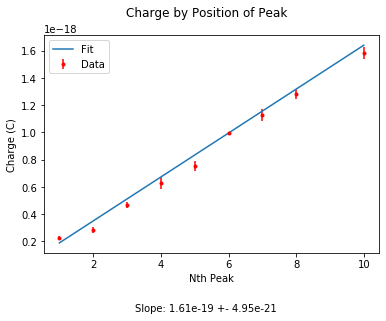

In [25]:
fit = intercept + np.array(x) * slope

plt.errorbar(x, y, yerr=sigma, fmt='r.', label='Data')
plt.plot(x, fit, label='Fit')
plt.legend()
plt.ylabel('Charge (C)')
plt.xlabel('Nth Peak')
plt.suptitle('Charge by Position of Peak')
plt.figtext(0.5, -0.08, 'Slope: {:.2e} +- {:.2e}'.format(slope, slope_unc), horizontalalignment='center')

print("Charge: {} +- {}".format(slope, slope_unc))